<a href="https://colab.research.google.com/github/alyssonfa/datasciencepucrio/blob/main/MVP_Alysson_Araujo_Acordos_judiciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

## Aluno: Alysson de Farias de Araujo

### Análise de Acordos Judiciais e Extrajudiciais de uma empresa de distribuição de combustíveis

## 1. Definição do Problema

O dataset utilizado neste MPV será o **Dataset - Recuperação de Crédito - Distribuidora de Combustíveis**, proveniente de uma adaptação de uma Planilha de Dados de Recuperação de Crédito da empresa para a qual trabalho atualmente. Os dados foram devidamente anonimizados e randomizados conforme a lógica comercial envolvida.

**Qual é a descrição do problema?** O objetivo é iniciar as etapas de análise de dados e pré-processamento de dados de um modelo que, ao final de seu desenvolvimento, seja capaz de observar o potencial de recuperação de crédito de uma determinada carteira de clientes. A ideia é que, a partir do trabalho com os dados dispostos nesse dataset, seja possível fazer o imput de novos casos, ainda sem resultado, e fazer uma previsão estimada de **resultado** e **tempo de negociação** para cada acordo.

**Este é um problema de aprendizado supervisionado ou não supervisionado?** Trata-se de aprendizado supervisionado, tendo em vista que estamos imputando diversos dados já constituídos.

**Que restrições ou condições foram impostas para selecionar os dados?** Este dataset conta apenas com os acordos proveniente de casos com ações judiciais em curso, e com valores acima de R$ 100.000,00.

**Que premissas ou hipóteses você tem sobre o problema?** Este dataset apresenta atributos relacionados a dados comerciais, no qual parte será utilizada para uma análise simples de distribuição geográfica dos acordos já finalizados (realizados ou não), e outra parte será utilizada também na condição de variável preditora.

Para mais detalhes sobre o dataset, consulte: https://github.com/alyssonfa/datasciencepucrio/blob/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv

Versão raw: https://raw.githubusercontent.com/alyssonfa/datasciencepucrio/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv


**Informações sobre os atributos:**

1. CLIENTE - Nome do cliente;
2. ESTADO - Estado do Brasil que se localiza o cliente;
3. REGIAO - Região do Brasil que se localiza o cliente - Aqui, entenderemos São Paulo como uma região a parte, tendo em vista que concentra grande parte dos clientes da empresa, necessitando de um tratamento particular, fora das demais regiões. Dessa forma SUDESTE e SÃO PAULO são regiões independentes, para fins dessa análise;
4. VALOR - Valor do acordo financeiro (em reais -R$);
5. STATUS - Se o estabelecimento está ativo ou já foi desativado;Forma de pagamento do acordo negociado;
6. DURACAO_PROC - Duração do processo judicial em trâmite (em meses);
7. FASE_PROC - Face processual na qual o processo se encontrava quanto o acordo começou a ser negociado;
8. GARANTIA - Se o contrato com o cliente tinha alguma garantia financeira, qualquer que seja sua natureza;
9. RESULTADO - Se o acordo foi realizado ou não;
10. TEMPO - O tempo que a negociação de acordo durou (em meses);


## 1.1. Importações
Nessa etapa, vamos fazer as importações necessárias para o desenvolvimento do MVP.

In [169]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:20,.2f}'.format

In [170]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carregamento dos dados

Vamos utilizar o pacote Pandas (Python Data Analysis Library) para realizar o carregamento do arquivo .csv que disponibilizei online.

Nesse passo, vou carregar o dataset, informar o cabeçalho das colunas, e nomear o primeiro carregamento do meu dataset. Para melhor compreensão, nomearei o dataset de **fda** (fuel distribution agreements).

Uma vez que o dataset estiver carregado, vamos explorar os dados ali contidos.

In [171]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/alyssonfa/datasciencepucrio/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv"

# Informa o cabeçalho das colunas
colunas = ['CLIENTE', 'ESTADO', 'REGIAO', 'VALOR', 'STATUS', 'DURACAO_PROC', 'FASE_PROC', 'GARANTIA', 'RESULTADO', 'TEMPO']

# Nomeando a primeira versão do carregamento do meu dataset, e determinando a leitura do arquivo utilizando as colunas informadas
fda = pd.read_csv(url, names=colunas, delimiter=',')

Antes de passar para o passo de análise de dados, utilizarei o comando ".head()" apenas para me certificar que o carregamento do dataset funcionou da forma como esperado, em especial o imput do cabeçalho das colunas. A visão das  5 primeiras linhas já será suficiente para essa verificação inicial.

In [172]:
fda.head(5)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
0,Auto Posto Mais 45,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6
1,Auto Posto Fi,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13
2,Auto Posto Terça-feira,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13
3,Rede Abastecedora Número 99,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12
4,Rede Abastecedora Número 93,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13


A disposição dos cabeçalhos ocorreu de forma como esperado. Em seguida, passamos à análise de dados.

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Iniciamos com a análise das estatísticas descritivas simples, como (i) a quantidade de atributos e instâncias; (ii) os tipos de atributos, e se há algum faltante; (iii) análise visual das primeiras e últimas 10 linhas de do dataframe, e o resumo estatístico dos atributos de valores numéricos. Em seguida, traremos algumas conclusões iniciais.

#### 3.1.1. Dimensão do dataset FDA

In [173]:
# Mostra as dimensões do dataset
print(fda.shape)

(355, 10)


A resposta nos mostra que estamos lidando com um dataset que conta com 10 colunas e 355 linhas.

#### 3.1.2. Informações do dataset FDA

In [174]:
# Mostra as informações do dataset
print(fda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CLIENTE       355 non-null    object
 1   ESTADO        355 non-null    object
 2   REGIAO        355 non-null    object
 3   VALOR         355 non-null    int64 
 4   STATUS        355 non-null    object
 5   DURACAO_PROC  355 non-null    int64 
 6   FASE_PROC     355 non-null    object
 7   GARANTIA      355 non-null    object
 8   RESULTADO     355 non-null    object
 9   TEMPO         355 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 27.9+ KB
None


Podemos observar uma maioria de atributos do tipo categórico, e apenas 3 numéricos. Isso nos sugere que, na etapa de pré-processamento de dados, pode ser necessária uma transformação do tipo 'one-hot encoding', para viabilizar uma futura etapa de machine learning.

Tambem podemos perceber que não há missings em nosso dataset.

Aqui, poderíamos ter usado o comando '.dtypes', mas o '.info' nos traz uma quantidade de informações mais completa, e não apenas os tipos dos atributos.

#### 3.1.3. Primeiras e últimas 10 linhas do dataset FDA

In [175]:
# Mostra as 10 primeiras linhas do dataset
fda.head(10)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
0,Auto Posto Mais 45,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6
1,Auto Posto Fi,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13
2,Auto Posto Terça-feira,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13
3,Rede Abastecedora Número 99,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12
4,Rede Abastecedora Número 93,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13
5,Auto Posto Nº 5,SP,SÃO PAULO,1500000,SIM,47,EXECUÇÃO,SIM,NÃO REALIZADO,13
6,Auto Posto Nº 50,SC,SUL,861645,SIM,47,EXECUÇÃO,SIM,REALIZADO,13
7,Auto Posto Nº 63,SP,SÃO PAULO,200000,NÃO,47,EXECUÇÃO,NÃO,NÃO REALIZADO,13
8,Rede Abastecedora Número 101,PA,NORTE,1750000,SIM,47,EXECUÇÃO,SIM,REALIZADO,8
9,Auto Posto Nº 10,GO,CENTRO OESTE,1350000,SIM,47,EXECUÇÃO,SIM,REALIZADO,12


In [176]:
# Mostra as 10 últimas linhas do dataset
fda.tail(10)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
345,Rede Abastecedora Número 3,RS,SUL,209000,SIM,13,EXECUÇÃO,SIM,REALIZADO,1
346,Auto Posto Nº 73,SP,SÃO PAULO,202000,NÃO,13,EXECUÇÃO,NÃO,NÃO REALIZADO,3
347,Auto Posto Mais 60,SP,SÃO PAULO,174000,NÃO,13,EXECUÇÃO,NÃO,NÃO REALIZADO,3
348,Auto Posto Nº 23,RN,NORDESTE,104000,NÃO,13,EXECUÇÃO,SIM,REALIZADO,3
349,Auto Posto Nº 66,MG,SUDESTE,424080,SIM,13,CONHECIMENTO,SIM,NÃO REALIZADO,2
350,Auto Posto Mais 83,PR,SUL,150000,SIM,13,EXECUÇÃO,SIM,REALIZADO,2
351,Rede Abastecedora Número 41,SP,SÃO PAULO,115854,NÃO,13,EXECUÇÃO,SIM,REALIZADO,2
352,Rede Abastecedora Número 92,SP,SÃO PAULO,109000,NÃO,13,CONHECIMENTO,NÃO,REALIZADO,2
353,Rede Abastecedora Número 38,RJ,SUDESTE,121600,NÃO,13,EXECUÇÃO,NÃO,REALIZADO,1
354,Rede Abastecedora Número 31,MG,SUDESTE,102868,NÃO,13,EXECUÇÃO,NÃO,REALIZADO,1


Visualizando as primeiras e últimas 10 linhas, podemos verificar a maioria de atributos categóricos descrito no comando '.info', utilizado anteriormente. Ademais, a visualização dos dados está correta, na forma como esperado.

#### 3.1.4. Resumo estatístico do dataset FDA

In [177]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
fda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VALOR,355.00,"623,825.30","815,703.84","100,000.00","150,000.00","307,639.00","750,000.00","5,226,514.00"
DURACAO_PROC,355.00,30.36,10.91,13.00,20.00,32.00,39.00,49.00
TEMPO,355.00,6.81,3.37,1.00,5.00,6.00,9.00,13.00


Fizemos o resumo estatístico dos atributos numéricos. Ajustei de forma horizontal, pois acredito ser mais agradável visualmente.

**VALOR**: Podemos perceber que o valor máximo se encontra muito distante do 3º quartil. Ou seja, 75% dos valores negociados estão abaixo de R$ 750.000,00, o valor máximo distoa bastante, podendo ser um possível outlier. Quanto ao valor mínimo, temos um número bem próximo do 1º quartil, não havendo tal distorção.

**DURACAO_PROC**: Aqui, os dados parecem ter uma distribuição razoavelmente simétrica, concentrando-se em torno da média de 30,36. No entanto, a presença de um desvio padrão relativamente alto sugere uma dispersão significativa dos valores, indicando que a variabilidade dos dados é considerável. Considerando que tais valores estão em meses, podemos dizer que a maioria dos processos já dura mais de 2 anos, e estão, no mínimo tramitando há 1 ano e 1 mês.

**TEMPO**: Para esse atributo, os dados indicam uma tendência central mais baixa, com uma dispersão moderada, uma vez que o desvio padrão é de 3,37, consideravelmente menor do que o encontrado no atributo DURACAO_PROC. Nesse caso, temos uma realidade em que 75% das negociações são finalizadas em 9 meses ou menos, demonstrando que poucas negociações chegam a completar 1 ano.

#### 3.1.5. Distribuição das classe do dataset FDA

Como os atributos categóricos não possibilitam um resumo estatístico na forma como os atributos numéricos, resolvi verificar a distribuição das classes, para verificar eventual problema de balanceamento.

In [178]:
print(fda.groupby('RESULTADO').size())

RESULTADO
NÃO REALIZADO     94
REALIZADO        261
dtype: int64


Podemos observar um desequilíbrio entre as classes "REALIZADO" e "NÃO REALIZADO". Essa discrepância na distribuição das classes pode impactar o desempenho de modelos de aprendizado de máquina, especialmente aqueles sensíveis ao desequilíbrio de classes.

In [179]:
print(fda.groupby('GARANTIA').size())

GARANTIA
NÃO    124
SIM    231
dtype: int64


Aqui temos um desequilíbrio menor do que no atributo anterior, mas ainda assim vemos um desequilíbrio que pode impactar o desempenho de modelos de aprendizado de máquina.

In [180]:
print(fda.groupby('STATUS').size())

STATUS
NÃO    142
SIM    213
dtype: int64


Aqui temos o menor desequilíbrio do dataset.

In [181]:
print(fda.groupby('FASE_PROC').size())

FASE_PROC
CONHECIMENTO    104
EXECUÇÃO        251
dtype: int64


Nesse caso, também vemos um desequilíbrio.

Precisamos verificar qual dessas classes deve ter seu problema de desbalanceamento resolvido, pois muitas delas não serão 'outputs' de um modelo de machine learning, mas sim uma variável de 'imput'. Como o objetivo do modelo é responder, mediante a alimentação dos dados, se um acordo será provavelmente REALIZADO ou NÃO REALIZADO, e em quantos meses a negociação demoraria, entedemos que a classe que precisa de uma correção quanto ao seu balanceamento é a "RESULTADO".

### 3.2. Visualizações

Nesse tópico vamos observar algumas visualizações que entendi serem interessantes para uma análise estatística e comercial dos dados dos acordos. Para isso vamos utilizar histogramas, gráficos de densidade, boxplots, dispersão, barra, misto, pizza e outros.

#### 3.2.1 Histograma

Vamos iniciar utilizando um histograma, para analisar a distribuição dos dados, fornecendo uma representação visual das frequências ou densidades em diferentes intervalos.

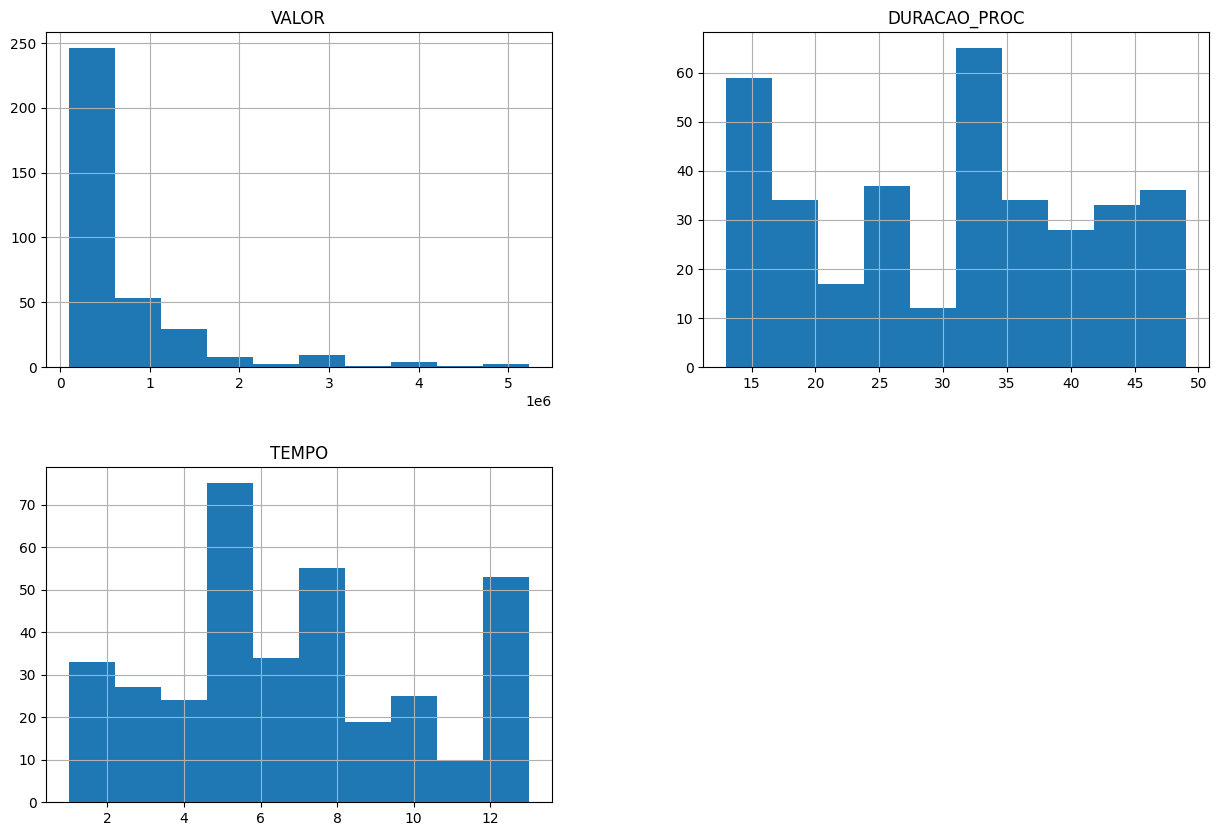

In [182]:
# Histograma
fda.hist(figsize = (15,10))
plt.show()

**VALOR**: Aqui temos um histograma distorcido, com uma distribuição exponencial, e uma concentração massiva de acordos com valores menores de 1 milhão de reais. É possível perceber algo que já haviamos sugerido anteriormente: a prensença de possíveis outliers, considerando as ocorrências entre 2 milhoes e 5 milhões de reais.

**DURACAO_PROC**: Aqui conseguimos verificar o aparecimento de dois picos, o que torna esse histograma bimodal, com concentração de frequência destacados entre a duração de 15 a 20 meses, e 30 a 35 meses.

**TEMPO**: Aqui, temos o aparecimento de ao menos 3 picos, o que torna esse histograma multimodal. Aqui vemos que os dados são heterogeneos, os 3 picos mostram uma possível existência de clusters ou subgrupos.

#### 3.2.2 Gráfico de densidade

Um gráfico de densidade é útil para visualizar a distribuição de probabilidade contínua de dados, proporcionando insights detalhados sobre a forma e concentração dos valores ao longo de uma escala.

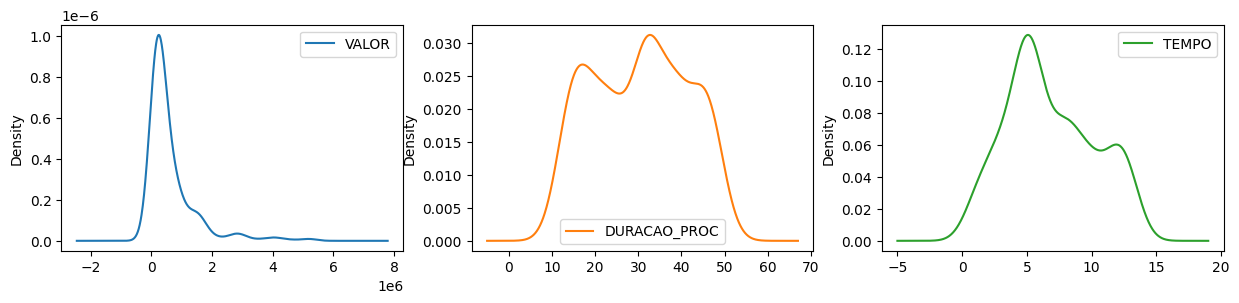

In [183]:
# Density Plot
fda.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Os resultados desses gráficos confirmam as informações obtidas por meio dos histogramas. Na verdade, quanto ao gráfico referente ao atributo Valor, vemos com ainda mais clareza sua exponencialidade e desequilíbrio. Os demais não mostram uma distribuição normal, mas nada que impacte severamente a análise, como o gráfico de valor.

#### 3.2.3 Gráfico boxplot


O boxplot é útil para visualizar a distribuição estatística de um conjunto de dados, fornecendo informações sobre a mediana, quartis, dispersão e detecção de outliers de forma concisa e eficaz. Aqui, poderemos identificar com certeza e precisão a presença dos outliers que já sugerimos na análise dos gráficos anteriores.

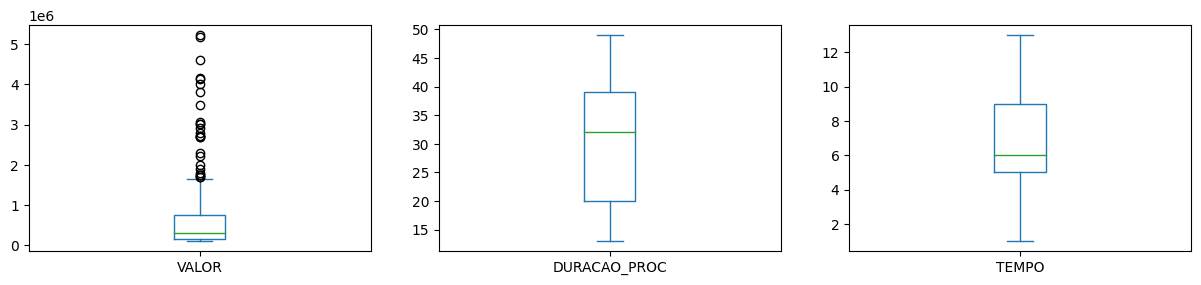

In [184]:
# Boxplot
fda.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()


**VALOR**: Temos um boxplot cuja variação entre a mínima e máxima é bem achatada, por conta da presença marcante de diversos outliers. Vemos que a maioria dos valores está abaixo de 2 mihões de reais, estando o 3º quartil abaixo de 1 milhão de reais. Nesse caso, está claro que esse atributo precisará passar por uma transformação na etapa de pré processamento de dados.

**DURACAO_PROC**: Vemos uma distribuição coerente, com uma mediana ligeiramente mais próxima do 3º quartil, do que do 1º quartil. As distâncias dos quartis para os valores máximo e mínimo estão relativamente equilibradas, mostrando uma distribuição razoável.

**TEMPO**: Nesse caso, temos uma mediana bem mais próxima do 1º quartil, mostrando que metade dos acordos são negociados em tempo menos do que 6 meses.As distâncias dos quartis para os valores máximo e mínimo estão relativamente equilibradas, mostrando uma distribuição razoável.

#### 3.2.4 Gráficos de dispersão

O gráfico de dispersão é útil para visualizar a relação entre duas variáveis, revelando padrões, tendências e identificando a presença de outliers em um conjunto de dados. Nesse caso, vamos focar em duas visualizações bastante úteis comercialmente: *(i)* Valor do acordo x Tempo de negociação x Resultado; *(ii)* Valor do acordo x Tempo de tramitação do processo judicial x Resultado.

**(i)** Valor do acordo x Tempo de negociação x Resultado

Para o primeiro gráfico, utilizamos um código que cria um gráfico de dispersão para visualizar a relação entre o valor do acordo e o tempo de negociação, colorindo os pontos de acordo com a categoria 'NÃO REALIZADO' ou 'REALIZADO'. Com isso podemos identificar alguma relação entre tais atributos.

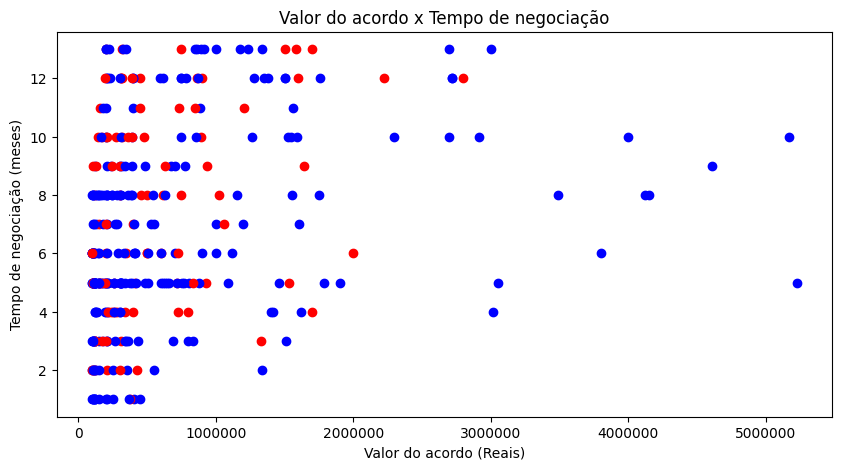

In [185]:
plt.figure(figsize=(10, 5))

# utilizando as cores para diferenciar os resultados
cores = {'NÃO REALIZADO':'r', 'REALIZADO':'b'}
for i in range(len(fda['RESULTADO'])):
  plt.scatter(fda['VALOR'][i], fda['TEMPO'][i],
              color=cores[fda['RESULTADO'][i]])

# título e nome dos eixos
plt.title('Valor do acordo x Tempo de negociação')
plt.xlabel('Valor do acordo (Reais)')
plt.ylabel('Tempo de negociação (meses)')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='x')

Com a leitura do gráfico, podemos perceber que, para valores acima de R$ 2.000.000,00 são necessários, no mínimo, 4 meses de negociação.

Também é possível observar que, muito embora estejam em menor quantidade, os casos com maiores valores envolvidos retornam negociações positivas, denotando que os maiores devedores, ao iniciar as negociações, tendem a acenar positivamente.

**(ii)** Valor do acordo x Tempo de tramitação do processo judicial x Resultado

Mais uma vez utilizamos um código que cria um gráfico de dispersão para visualizar a relação entre o valor do acordo e o tempo de tramitação do processo judicial, colorindo os pontos de acordo com a categoria 'NÃO REALIZADO' ou 'REALIZADO'. Com isso podemos identificar alguma relação entre tais atributos.

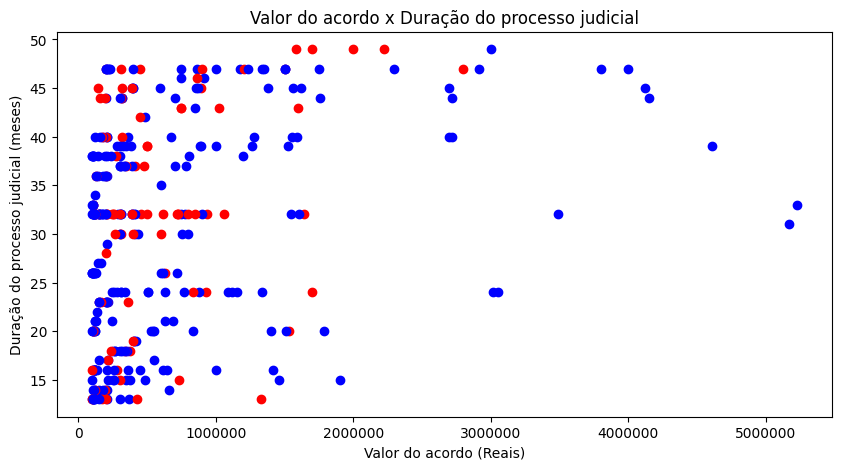

In [149]:
plt.figure(figsize=(10, 5))

# utilizando as cores para diferenciar os resultados
cores = {'NÃO REALIZADO':'r', 'REALIZADO':'b'}
for i in range(len(fda['RESULTADO'])):
  plt.scatter(fda['VALOR'][i], fda['DURACAO_PROC'][i],
              color=cores[fda['RESULTADO'][i]])

# título e nome dos eixos
plt.title('Valor do acordo x Duração do processo judicial')
plt.xlabel('Valor do acordo (Reais)')
plt.ylabel('Duração do processo judicial (meses)')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='x')

Com uma análise inicial, é possível perceber maior concentração de acordos não realizados entre 25 e 40 meses de tramitação processual. Isso demonstra, em certa medida, que há uma tendência em se fazer acordos nos primeiros 2 anos de tramitação da ação, ou a partir dos 3 anos e 6 meses, aproximadamente. Entre as duas durações, há um volume maior de acordos não realizados.

#### 3.2.5 Gráfico pizza

Um gráfico de pizza é útil para representar a distribuição proporcional de categorias em um conjunto de dados. Ele proporciona uma visualização rápida das partes relativas do todo, destacando a contribuição percentual de cada categoria. Nesse caso, nossa utilização óbvia é mostrar qual a porcentagem de sucesso nas negociações de acordo analisadas.

Para isso, vamos criar um gráfico em pizza, com porcentagem e valor absoluto, entre os REALIZADOS e NÃO REALIZADOS, discriminados pelas cores azul e vermelho, respectivamente.








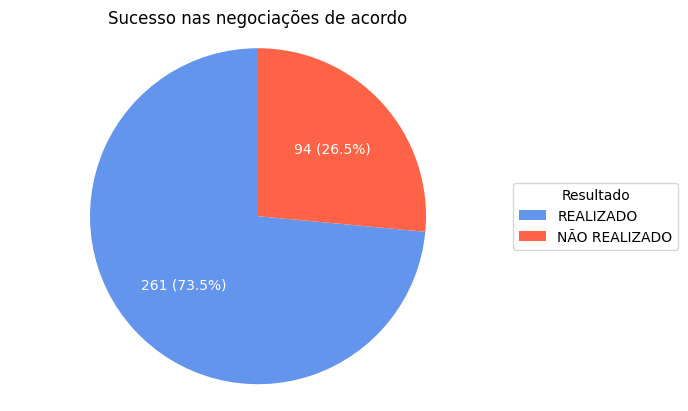

In [112]:
# Calcular a soma da coluna 'VALOR' para cada resultado
soma_valores_resultados = fda.groupby('RESULTADO')['VALOR'].sum()

# Contagem de realizados e não realizados
contagem_resultados = fda['RESULTADO'].value_counts()

# Criar o gráfico de pizza
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(contagem_resultados,
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(contagem_resultados) / 100, p),
    textprops=dict(color="w"), startangle=90, colors=['#6495ED', '#FF6347'])
ax.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo.

# Adicionar título
ax.set_title('Sucesso nas negociações de acordo')

# Adicionar legenda
ax.legend(wedges, contagem_resultados.index, title='Resultado',
          loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()

Nesse caso, a conclusão é simples: há uma porcentagem de sucesso de 73,5 % das negociações.

#### 3.2.6 Gráficos de barras e mistos

Nessa etapa, vamos fazer uma análise cada vez mais comercial, ainda que prévia, dos dados disponibilizados. Dispusemos os gráficos da seguinte forma:

(i) Somatório dos Valores de Acordo x Região e Resultado

(ii) Negociações x Média de Tempo por Estado

(iii) Garantia x Resultado

(iv) Fase processual x Resultado

(v) Status do Posto de combustível x Resultado

**(i)** Somatório dos Valores de Acordo x Região e Resultado

Nesse gráfico, escolhemos a visualização de barras lado a lado, com a indicação, por região, dos acordos realizados e não realizados, em cores diferentes. Para auxiliar na percepção, colocamos em ordem descrescente, com os rótulos de valores sobre cada barra, e linhas de grade em cor suave.

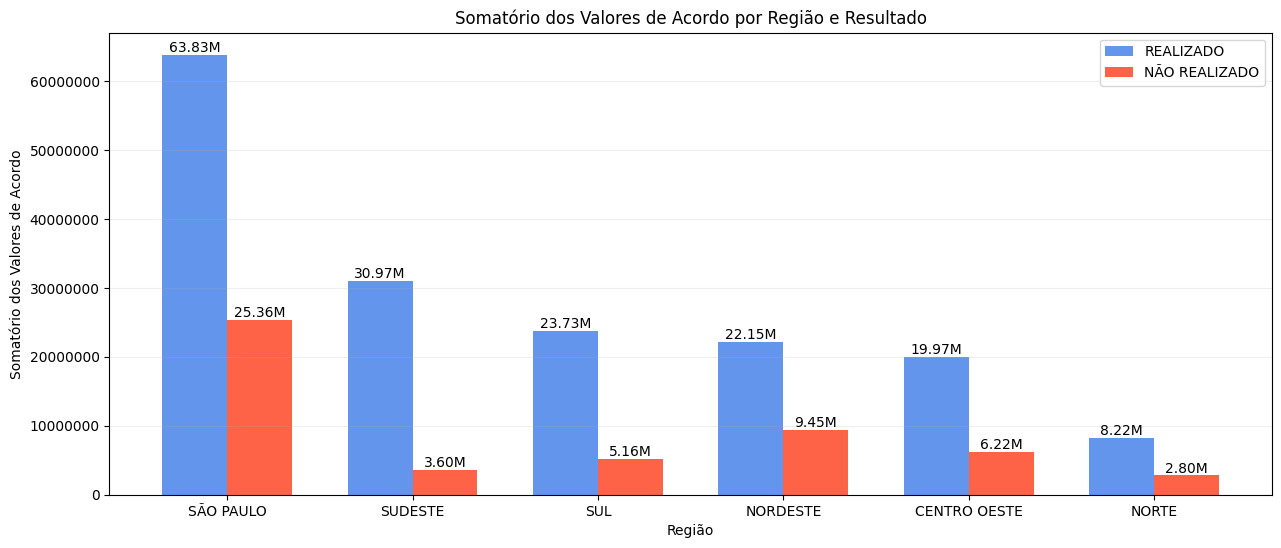

In [109]:
# Agrupar por região e calcular o somatório dos valores de acordo
agrupado = fda.groupby('REGIAO')['VALOR'].sum().reset_index()

# Criar um DataFrame com colunas 'REALIZADO' e 'NÃO REALIZADO'
# usando pivot_table
pivot_fda = fda.pivot_table(index='REGIAO', columns='RESULTADO', values='VALOR',
                            aggfunc='sum').reset_index()

# Ordenar o DataFrame pelo valor de 'REALIZADO' em ordem decrescente
pivot_fda = pivot_fda.sort_values(by='REALIZADO', ascending=False)

# Criar o gráfico de barras duplas
bar_width = 0.35
fig, ax = plt.subplots(figsize=(15, 6))

# Linhas de grade horizontais em cinza
ax.yaxis.grid(True, linestyle='-', alpha=0.2)

# Fazendo o ajuste manual da posição das barras para ficarem lado a lado,
# e colocando as cores azul e vermelho
bar_positions = range(len(pivot_fda['REGIAO']))
bar1 = ax.bar(bar_positions, pivot_fda['REALIZADO'], width=bar_width,
              label='REALIZADO', align='center', color='#6495ED')
bar2 = ax.bar([pos + bar_width for pos in bar_positions],
              pivot_fda['NÃO REALIZADO'], width=bar_width,
              label='NÃO REALIZADO', align='center', color='#FF6347')

# Adicionar rótulos e título ao gráfico
ax.set_xlabel('Região')
ax.set_ylabel('Somatório dos Valores de Acordo')
ax.set_title('Somatório dos Valores de Acordo por Região e Resultado')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(pivot_fda['REGIAO'])
ax.legend()

# Adicionar rótulos sobre as barras, com abreviação para que não fiquem rótulos muito extensos
for i, (val_realizado, val_nao_realizado) in enumerate(zip(pivot_fda['REALIZADO'],
                                                  pivot_fda['NÃO REALIZADO'])):
    ax.text(i, val_realizado, '{:.2f}M'.format(val_realizado / 1e6),
            ha='center', va='bottom')
    ax.text(i + bar_width, val_nao_realizado,
            '{:.2f}M'.format(val_nao_realizado / 1e6),
            ha='center', va='bottom')

# Retirando a notação científica
plt.ticklabel_format(style='plain', axis='y')

# Exibir o gráfico
plt.show()

Como já tratado anteriormente, temos a região referente ao estado de São Paulo com o maior valor de acordos realizados e não realizados. Embora seja o que tem maior valor e quantidade de acordos realizados, não esta região que tem a melhor taxa de sucesso nas negociações. Nesse caso, temos a região sudeste, que contempla, nesse caso, somente os estados do RJ, MG e ES, com uma proporção de valores referente a acordos realizados quase 10 vezes maior que os não realizados.

**(ii)** Negociações x Média de Tempo por Estado

Nesse gráfico, escolhemos a visualização mista de barras e linha, dessa vez sem a indicação de sucesso nos acordos. O objetivo aqui, é verificar o volume de casos por estado, e o tempo médio de negociação de acordo em cada um deles. Para isso, utilizamos as barras representando os estados, na cor azul, usando o eixo Y à esquerda para mostrar o número de negociações, e a linha representando a média de tempo por estado, na cor verde, usando o eixo Y à direita, mostrando as médias de tempo.

Resolvemos incluir linhas de grade apenas para o eixo Y relativo à média de tempo, pois preferimos não incluir o rótulo na linha, para não poluir a imagem. As barras contam com rótulos, e por isso não se fez necessária a linha de grade do eixo Y à esquerda.

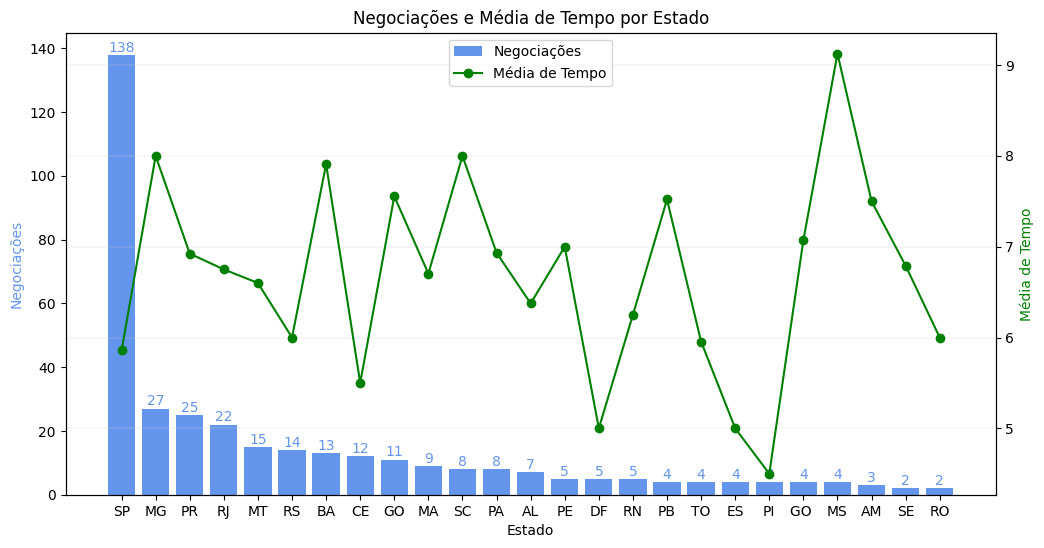

In [163]:
# Contagem de linhas por estado
contagem_estado = fda['ESTADO'].value_counts()

# Média de tempo por estado
media_tempo_estado = fda.groupby('ESTADO')['TEMPO'].mean()

# Ordenar o DataFrame pelo valor da contagem em ordem decrescente
contagem_estado = contagem_estado.sort_values(ascending=False)

# Plotar o gráfico misto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para a contagem de negociações por estado (em azul)
bar_positions = np.arange(len(contagem_estado))
ax1.bar(bar_positions, contagem_estado, color='#6495ED', label='Negociações')

# Adicionar rótulos e título para o primeiro eixo Y
ax1.set_xlabel('Estado')
ax1.set_ylabel('Negociações', color='#6495ED')
ax1.set_title('Negociações e Média de Tempo por Estado')

# Reindexar os rótulos do eixo X na ordem correta
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(contagem_estado.index, rotation=0, ha='center')

for i, v in enumerate(contagem_estado):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10,
             color='#6495ED')

# Criar o segundo eixo Y para a linha da média de tempo por estado (em verde)
ax2 = ax1.twinx()
ax2.plot(bar_positions, media_tempo_estado, color='green', marker='o',
         label='Média de Tempo')

# Adicionar linhas de grade em cinza claro
ax2.grid(color='lightgrey', linestyle='-', linewidth=0.25)

# Adicionar rótulos e título para o segundo eixo Y
ax2.set_ylabel('Média de Tempo', color='green')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

# Exibir o gráfico
plt.show()

Mais uma vez destacamos a concentração de negociações no estado de São Paulo, estando em segundo lugar o estado de Minas Gerais, com menos de 5 vezes o valor de São Paulo.

Percebemos também, que embora concentre a maioria das negociações, São Paulo tem uma média de tempo de negociação menor do que vários outros estados, estando acima apenas do Ceará, Distrito Federal, Espírito Santo e Piauí, respectivamente. Mato Grosso do Sul é o estado com maior tempo de negociação, em média.

**(iii)** Garantia x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a existência de garantias contratuais, e o resultado das negociações.

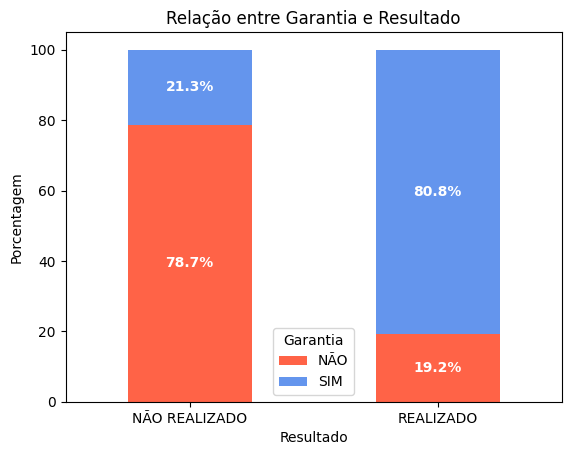

In [113]:
# Criar DataFrame com contagem de 'GARANTIA' para cada 'RESULTADO'
contagem_garantia_resultado = fda.groupby(['RESULTADO', 'GARANTIA']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_garantia_resultado_percentual = contagem_garantia_resultado.div(contagem_garantia_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_garantia_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Garantia e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_garantia_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_garantia_resultado_percentual.columns):
        porcentagem = contagem_garantia_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Garantia', loc='lower center')

# Exibir o gráfico
plt.show()

Podemos perceber, nitidamente, que mais de 80% dos acordos realizados advém de contratos comerciais com garantias. Enquanto nos não realizados, há uma predominância, quase em mesma medida, dos contratos sem garantias. Ou seja, para que haja uma taxa de sucesso maior, recomenda-se que todos os contratos comerciais tenham garantias, pois há uma probabilidade maior de negociação em caso de pendência judicial.

**(iv)** Fase processual x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a Fase Processual, e o resultado das negociações.

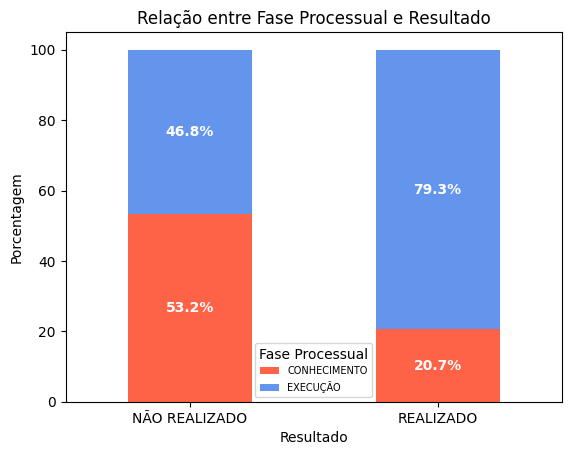

In [114]:
# Criar DataFrame com contagem de 'FASE_PROC' para cada 'RESULTADO'
contagem_fase_resultado = fda.groupby(['RESULTADO', 'FASE_PROC']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_fase_resultado_percentual = contagem_fase_resultado.div(contagem_fase_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_fase_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Fase Processual e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_fase_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_fase_resultado_percentual.columns):
        porcentagem = contagem_fase_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Fase Processual', loc='lower center', fontsize=7)

# Exibir o gráfico
plt.show()

Nesse caso, temos uma análise um pouco diferente. Podemos ver que quase 80% dos acordos realizados são feitos no âmbito de ações judiciais que já estão na fase de execução, ou seja, com possibilidade real e premente de constrições de bens patrimoniais do devedor. Nos não realizados, há um equilíbrio bastante consistente. Isso mostra que, nos acordos não realizados, há uma indiferença quanto à fase processual. Esse gráfico nos sugere uma outra forma de visualização, que seria a de Resultado por Fase Processual, que será feito em outra oportunidade, para melhor conclusão.

**(v)** Status do Posto de combustível x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a o status de atividade do posto de combustível (ativo ou inativo), e o resultado das negociações.

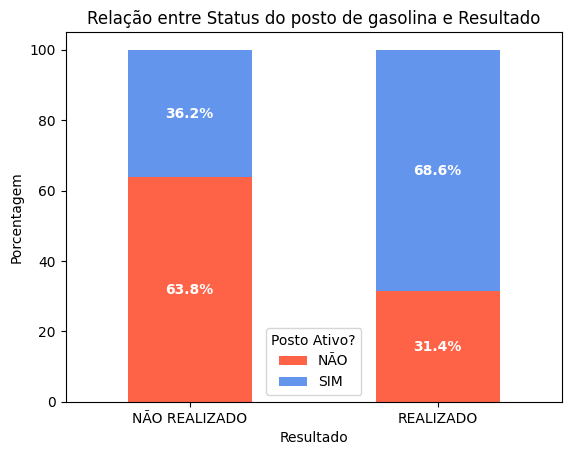

In [115]:
# Criar DataFrame com contagem de 'STATUS' para cada 'RESULTADO'
contagem_status_resultado = fda.groupby(['RESULTADO', 'STATUS']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_status_resultado_percentual = contagem_status_resultado.div(contagem_status_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_status_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Status do posto de gasolina e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_status_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_status_resultado_percentual.columns):
        porcentagem = contagem_status_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Posto Ativo?', loc='lower center')

# Exibir o gráfico
plt.show()

Nesse gráfico é possível perceber que há uma propensão maior de postos de combustível em operação em realizados acordos, do que os postos desativados. Isso chama a atenção para a necessidade buscar o acordo com o posto de combustível ainda em atividade, pois uma vez inativo, o potencial de acordo diminui bastante.

## 4. Pré-Processamento de Dados

Como uma etapa prévia, vamos verificar novamente a existência de missings. Como não temos missings, passaremos adiante para as transformações necessárias.

In [116]:
# verificando nulls no dataset
fda.isnull().sum()

CLIENTE         0
ESTADO          0
REGIAO          0
VALOR           0
STATUS          0
DURACAO_PROC    0
FASE_PROC       0
GARANTIA        0
RESULTADO       0
TEMPO           0
dtype: int64

### 4.1. Feature selection

A seleção de características, também conhecida como feature selection, se consiste em usar apenas um subconjunto das características (atributos) originais, desconsiderando as características redundantes ou irrelevantes. Afinal, um dataset menor tem menor custo de processamento, e a redução de dimensionalidade pode eliminar características irrelevantes, reduzir ruídos e remover dependências lineares entre os atributos, como variáveis correlacionadas.

Nesse caso, identificamos que a coluna CLIENTE, que consta o nome do cliente, não é relevante para nossa análise. Não há repetição entre os nomes, tendo em vista que todas as negociações de um cliente são agrupadas em uma única linha. Dessa forma, optamos por retirar essa coluna.

In [117]:
# Remove a coluna chamada 'CLIENTE' do DataFrame fda e cria um novo DataFrame
# chamado fda_semcliente que não possui mais essa coluna.
fda_semcliente = fda.drop(columns=['CLIENTE'])

# Exibe as primeiras 10 linhas do novo DataFrame
fda_semcliente.head(10)

,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
0,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6
1,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13
2,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13
3,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12
4,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13
5,SP,SÃO PAULO,1500000,SIM,47,EXECUÇÃO,SIM,NÃO REALIZADO,13
6,SC,SUL,861645,SIM,47,EXECUÇÃO,SIM,REALIZADO,13
7,SP,SÃO PAULO,200000,NÃO,47,EXECUÇÃO,NÃO,NÃO REALIZADO,13
8,PA,NORTE,1750000,SIM,47,EXECUÇÃO,SIM,REALIZADO,8
9,GO,CENTRO OESTE,1350000,SIM,47,EXECUÇÃO,SIM,REALIZADO,12


### 4.2. Transformação logarítmica


A transformação logarítmica é uma técnica estatística que reduz a influência de valores extremos, tornando distribuições assimétricas mais simétricas. Essa transformação é útil para lidar com dados de ampla variação, melhorando a interpretação e estabilidade estatística.

Nesse notebook, verificamos que o atributo "VALOR" tem dados muito mal distribuídos, com diversos outliers que deformam alguns gráficos e atrapalham a visualização e uma futura utilização do dataser com Machine Learning. Dessa forma, optamos por fazer a transformação logarítmica no referido atributo, e adicionar o resultado em uma coluna nova de nosso dataset.

In [165]:
# Calcula o logaritmo natural (base e) para cada valor na coluna 'VALOR' e cria uma nova coluna 'VALOR_log'
VALOR_log = np.log(fda_semcliente['VALOR'])
fda_semcliente['VALOR_log'] = VALOR_log

# Exibe as primeiras 10 linhas do DataFrame
fda_semcliente.head(10)


,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO,VALOR_log
0,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6,14.51
1,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13,14.92
2,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13,14.35
3,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12,14.61
4,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13,14.27
5,SP,SÃO PAULO,1500000,SIM,47,EXECUÇÃO,SIM,NÃO REALIZADO,13,14.22
6,SC,SUL,861645,SIM,47,EXECUÇÃO,SIM,REALIZADO,13,13.67
7,SP,SÃO PAULO,200000,NÃO,47,EXECUÇÃO,NÃO,NÃO REALIZADO,13,12.21
8,PA,NORTE,1750000,SIM,47,EXECUÇÃO,SIM,REALIZADO,8,14.38
9,GO,CENTRO OESTE,1350000,SIM,47,EXECUÇÃO,SIM,REALIZADO,12,14.12


### 4.3. One-hot encoding

One-hot encoding é uma técnica de transformação de variáveis categóricas em uma representação binária, onde cada categoria é representada como uma coluna binária distinta. Em outras palavras, cria-se uma coluna para cada categoria única, preenchida com 0 ou 1 para indicar a presença ou ausência da categoria em uma determinada observação.

Vamos utilizar essa abordagem para viabilizar a aplicação do presente notebook para utilização com machine learning no futuro. Assim, vamos transformar as colunas GARANTIA, RESULTADO e STATUS, mantendo as colunas originais, e gerando colunas extras com o resultado do one-hot encoding. O nome do nosso novo dataframe será **fda_v2**.

In [119]:
# Colunas originais
colunas_originais = fda_semcliente.columns

# Aplicar a codificação one-hot
fda_onehot = pd.get_dummies(fda_semcliente, columns=['GARANTIA', 'RESULTADO', 'STATUS'])

# Concatenar os DataFrames
fda_v2 = pd.concat([fda_semcliente, fda_onehot], axis=1)

# Exibir o DataFrame resultante
fda_v2.head(10)

,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO,VALOR_log,...,DURACAO_PROC,FASE_PROC,TEMPO,VALOR_log,GARANTIA_NÃO,GARANTIA_SIM,RESULTADO_NÃO REALIZADO,RESULTADO_REALIZADO,STATUS_NÃO,STATUS_SIM
0,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6,14.51,...,49,CONHECIMENTO,6,14.51,1,0,1,0,0,1
1,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13,14.92,...,49,EXECUÇÃO,13,14.92,0,1,0,1,0,1
2,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13,14.35,...,49,CONHECIMENTO,13,14.35,0,1,1,0,0,1
3,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12,14.61,...,49,CONHECIMENTO,12,14.61,1,0,1,0,0,1
4,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13,14.27,...,49,EXECUÇÃO,13,14.27,0,1,1,0,0,1
5,SP,SÃO PAULO,1500000,SIM,47,EXECUÇÃO,SIM,NÃO REALIZADO,13,14.22,...,47,EXECUÇÃO,13,14.22,0,1,1,0,0,1
6,SC,SUL,861645,SIM,47,EXECUÇÃO,SIM,REALIZADO,13,13.67,...,47,EXECUÇÃO,13,13.67,0,1,0,1,0,1
7,SP,SÃO PAULO,200000,NÃO,47,EXECUÇÃO,NÃO,NÃO REALIZADO,13,12.21,...,47,EXECUÇÃO,13,12.21,1,0,1,0,1,0
8,PA,NORTE,1750000,SIM,47,EXECUÇÃO,SIM,REALIZADO,8,14.38,...,47,EXECUÇÃO,8,14.38,0,1,0,1,0,1
9,GO,CENTRO OESTE,1350000,SIM,47,EXECUÇÃO,SIM,REALIZADO,12,14.12,...,47,EXECUÇÃO,12,14.12,0,1,0,1,0,1


Após todas as modificações, vejamos como estão os tipos dos atributos.

In [120]:
fda_v2.dtypes

ESTADO                      object
REGIAO                      object
VALOR                        int64
STATUS                      object
DURACAO_PROC                 int64
FASE_PROC                   object
GARANTIA                    object
RESULTADO                   object
TEMPO                        int64
VALOR_log                  float64
ESTADO                      object
REGIAO                      object
VALOR                        int64
DURACAO_PROC                 int64
FASE_PROC                   object
TEMPO                        int64
VALOR_log                  float64
GARANTIA_NÃO                 uint8
GARANTIA_SIM                 uint8
RESULTADO_NÃO REALIZADO      uint8
RESULTADO_REALIZADO          uint8
STATUS_NÃO                   uint8
STATUS_SIM                   uint8
dtype: object

## 5. Conclusão

Neste MVP, pudemos passar por algumas das etapas básicas relativas à análise de dados e pré-processamento de dados.

Especificamente quanto as operações realizadas, foi possível perceber a importância de levantas as principais dados de estatística descritiva do dataset, para entender suas características, adiantar obstáculos, e escolher as melhores visualizações. Fazendo mão das visualizações diversas que estão disponíveis, pudemos verificar distorções, tendências e relações em nossos dados, de forma a já possibilitar algumas conclusões, e mais importante do que isso, verificar quais ferramentas de pré-processamento de dados serão necessárias. Na etapa de pré-processamento de dados, temos a oportunidade de preparar e transformar os dados disponíveis para que estes sejam utilizados da maneira mais adequada para os fins do projeto.

Saindo da parte mais conceitual, e para a comercial: Muito embora o objetivo final deste MVP (que possivelmente me acompanhará no decorrer do curso) seja prever o potencial de acordo e o tempo de negociação, conseguimos desde essa etapa inicial, tirar diversos insights valiosos para o negócio no qual o dataset está inserido. Transcrevo aqui, algumas conclusões que foram tiradas de certas etapas desse MVP:

*   75% dos valores negociados estão abaixo de R$ 750.000,00

*   a maioria dos processos já dura mais de 2 anos, e estão, no mínimo tramitando há 1 ano e 1 mês.

*   75% das negociações são finalizadas em 9 meses ou menos, demonstrando que poucas negociações chegam a completar 1 ano.

*   para valores acima de R$ 2.000.000,00 são necessários, no mínimo, 4 meses de negociação.

*   muito embora estejam em menor quantidade, os casos com maiores valores envolvidos retornam negociações positivas, denotando que os maiores devedores, ao iniciar as negociações, tendem a acenar positivamente.

*   há uma tendência em se fazer acordos nos primeiros 2 anos de tramitação da ação, ou a partir dos 3 anos e 6 meses, aproximadamente. Entre as duas durações, há um volume maior de acordos não realizados.

*   há uma porcentagem de sucesso de 73,5 % das negociações.

*   estado de São Paulo com o maior valor de acordos realizados e não realizados. Embora seja o que tem maior valor e quantidade de acordos realizados, não esta região que tem a melhor taxa de sucesso nas negociações Nesse caso, temos a região sudeste, que contempla, nesse caso, somente os estados do RJ, MG e ES, com uma proporção de valores referente a acordos realizados quase 10 vezes maior que os não realizados.

*   concentração de negociações no estado de São Paulo, estando em segundo lugar o estado de Minas Gerais, com menos de 5 vezes o valor de São Paulo.

*   São Paulo tem uma média de tempo de negociação menor do que vários outros estados, estando acima apenas do Ceará, Distrito Federal, Espírito Santo e Piauí, respectivamente. Mato Grosso do Sul é o estado com maior tempo de negociação, em média.

*   para que haja uma taxa de sucesso maior, recomenda-se que todos os contratos comerciais tenham garantias, pois há uma probabilidade maior de negociação em caso de pendência judicial.

*   há uma propensão maior de postos de combustível em operação em realizados acordos, do que os postos desativados. Isso chama a atenção para a necessidade buscar o acordo com o posto de combustível ainda em atividade, pois uma vez inativo, o potencial de acordo diminui bastante.





